In [59]:
simple_grammar = """      
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐着 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [60]:
another_grammar = """
#
"""

In [61]:
import random

In [62]:
def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [63]:
def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [64]:
adj_star()

'好看的'

## But the question is ?##

In [65]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [66]:
def create_grammar(grammar_str, split='=>', line_split='\n'):   #创建语法
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [67]:
choice = random.choice

def generate(gram, target):   #生成句子
    if target not in gram:
        return target
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return ''.join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [68]:
example_grammar = create_grammar(simple_grammar)

In [69]:
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐着'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [72]:
generate(gram=example_grammar,target='sentence')

'这个好看的女人看着一个小小的桌子'

In [73]:
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们
寻找 = 找找 | 想找点
活动 = 乐子 | 玩的
"""

host = """
host = 寒暄 报数 询问 业务相关 结尾
报数 = 我是 数字 号 ，
数字 = 单个数字 | 数字 单个数字
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ，
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [74]:
for i in range(20):
    print(generate(gram=create_grammar(host,split='='),target='host'))

你好我是71号，请问你要打猎吗？
小朋友，您好我是9号，您需要赌博吗？
你好我是3号，请问你要打猎吗？
您好我是973号，请问你要打猎吗？
您好我是735号，您需要赌博吗？
您好我是1号，请问你要赌博吗？
你好我是5328号，您需要打猎吗？
小朋友，您好我是328687号，您需要打猎吗？
女士，您好我是39号，您需要赌博吗？
您好我是62号，请问你要赌博吗？
先生，您好我是7号，您需要打牌吗？
您好我是3号，您需要打猎吗？
女士，你好我是2号，请问你要喝酒吗？
先生，你好我是8号，您需要打牌吗？
您好我是8号，您需要打猎吗？
您好我是4号，请问你要赌博吗？
你好我是49号，您需要赌博吗？
您好我是9号，您需要打猎吗？
您好我是716号，请问你要赌博吗？
女士，你好我是52号，请问你要赌博吗？


## Data Driven ##
我们的目标是，希望能做一个程序。然后，当输入的数据变化的时候，我们的程序不用重写。

In [75]:
programming = """
stmt => if_exp | while_exp | assignment
assignment => var = var
if_exp => if (var) { /n .... stmt}
while_exp => while (var) {/n .... stmt}
var => chars number
chars => char | char char
char => student | name | info | database | course
number => 1 | 2 | 3
"""

In [76]:
print(generate(gram=create_grammar(programming, split='=>'),target = 'stmt'))

if(var){
....stmt}


## Language Model ##

In [77]:
random.choice(range(100))

55

In [78]:
import pandas as pd

In [79]:
filename = r"D:\book\datasource-master\export_sql_1558435\sqlResult_1558435.csv"

In [80]:
content = pd.read_csv(filename, encoding='gb18030')

In [81]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [82]:
articles = content['content'].tolist()

In [83]:
len(articles)

89611

In [84]:
import re

In [85]:
def token(string):
    return re.findall('\w+',string)

In [86]:
from collections import Counter   #Counter是一个有助于 hashable 对象计数的 dict 子类。它是一个无序的集合，
                                   #其中 hashable 对象的元素存储为字典的键，它们的计数存储为字典的值，计数可以为任意整数，包括零和负数
import jieba

In [88]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\23139\AppData\Local\Temp\jieba.cache
Loading model cost 0.964 seconds.
Prefix dict has been built succesfully.


In [89]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [90]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [91]:
articles_clean = [''.join(token(str(a))) for a in articles]

In [92]:
len(articles_clean)

89611

In [93]:
with open(r'D:\book\NLPwork\article_9k.txt','w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [95]:
def cut(string):
    return list(jieba.cut(string))

In [96]:
TOKEN = []

In [99]:
for i, line in enumerate((open(r'D:\book\NLPwork\article_9k.txt'))):
    if i % 100 == 0:
        print(i)
        
        if i > 20000:
            break
        TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [100]:
from functools import reduce
from operator import add, mul

In [101]:
reduce(add,[1,2,3,4,5,8])

23

In [102]:
[1,2,3]+[3,43,5]

[1, 2, 3, 3, 43, 5]

In [103]:
from collections import Counter

In [104]:
words_count = Counter(TOKEN)

In [105]:
words_count.most_common(100)

[('的', 9497),
 ('在', 2729),
 ('了', 2359),
 ('是', 1622),
 ('和', 1531),
 ('年', 1001),
 ('月', 994),
 ('n', 942),
 ('也', 923),
 ('他', 850),
 ('有', 736),
 ('中国', 719),
 ('日', 709),
 ('等', 643),
 ('为', 631),
 ('我', 573),
 ('与', 570),
 ('将', 565),
 ('中', 527),
 ('就', 525),
 ('上', 520),
 ('对', 520),
 ('\n', 503),
 ('说', 489),
 ('发展', 489),
 ('都', 479),
 ('不', 471),
 ('到', 468),
 ('一个', 445),
 ('被', 436),
 ('这', 433),
 ('个', 433),
 ('但', 421),
 ('人', 421),
 ('从', 370),
 ('美国', 367),
 ('我们', 366),
 ('创新', 364),
 ('会', 363),
 ('新华社', 350),
 ('6', 346),
 ('城市', 336),
 ('０', 332),
 ('国家', 311),
 ('还', 302),
 ('要', 300),
 ('旅游', 298),
 ('经济', 295),
 ('记者', 291),
 ('大', 289),
 ('没有', 287),
 ('并', 286),
 ('后', 284),
 ('产业', 281),
 ('她', 279),
 ('自己', 277),
 ('他们', 275),
 ('进行', 274),
 ('4', 272),
 ('以', 271),
 ('表示', 268),
 ('科技', 263),
 ('可以', 260),
 ('而', 258),
 ('着', 256),
 ('已经', 253),
 ('企业', 253),
 ('中心', 250),
 ('更', 237),
 ('新', 236),
 ('广州', 230),
 ('失踪', 228),
 ('文化', 225),
 ('多', 218),
 ('这

In [106]:
frequiences = [f for w, f in words_count.most_common(100)]

In [107]:
x = [i for i in range(100)]

In [108]:
%matplotlib inline

In [109]:
import matplotlib.pyplot as plt

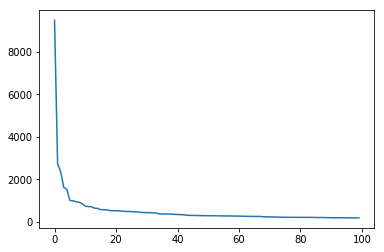

In [110]:
plt.plot(x,frequiences)

In [111]:
import numpy as np

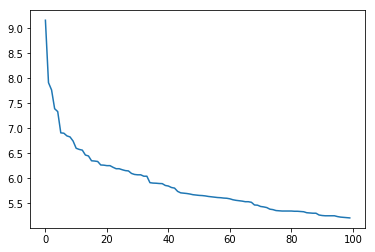

In [112]:
plt.plot(x, np.log(frequiences))

In [113]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [114]:
prob_1("我们")

0.0019563404673836353

In [115]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [116]:
TOKEN = [str(t) for t in TOKEN]

In [117]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [118]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [119]:
words_count_2 = Counter(TOKEN_2_GRAM)

In [120]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

In [122]:
def prob_2(word1,word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1+word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [123]:
prob_2("我们","在")

0.00010690499353224789

In [124]:
prob_2("在","吃饭")

5.345249676612395e-06

In [125]:
prob_2("去","吃饭")

5.345249676612395e-06

In [126]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    return sentence_pro

In [127]:
get_probablity('小明今天抽奖抽到一台苹果手机')

2.3324265453486517e-32

In [128]:
get_probablity('小明今天抽奖抽到一架波音飞机')

2.3324265453486517e-32

In [129]:
get_probablity('洋葱奶昔来一杯')

1.5272283867675626e-16

In [130]:
get_probablity('养乐多绿来一杯')

2.8571694105324914e-11

In [131]:
for sen in [generate(gram=example_grammar,target='sentence') for i in range(10)]:
    print('sentence:{} with Prb:{}'.format(sen, get_probablity(sen)))

sentence:这个桌子看着这个小小的好看的好看的桌子 with Prb:3.2059332270959936e-47
sentence:这个女人听着这个篮球 with Prb:1.3090650688707492e-26
sentence:这个蓝色的好看的好看的蓝色的小小的好看的小猫听着这个桌子 with Prb:3.597269317916511e-83
sentence:一个桌子听着这个小小的篮球 with Prb:6.997279636045955e-32
sentence:这个桌子看着这个蓝色的篮球 with Prb:2.3324265453486517e-32
sentence:这个女人看着一个桌子 with Prb:8.163417040482583e-22
sentence:这个好看的好看的蓝色的蓝色的小猫坐着这个好看的小小的女人 with Prb:1.0791807953749531e-82
sentence:一个蓝色的好看的桌子看见一个好看的桌子 with Prb:1.7136513545375793e-52
sentence:一个篮球听着一个小猫 with Prb:4.3635502295691645e-27
sentence:一个女人看见这个小猫 with Prb:8.163417040482583e-22


In [132]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

In [133]:
for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    print('{} is more possible'.format(better))
    print('-'*4 + '{} with probility {}'.format(s1,p1))
    print('-'*4 + '{} with probility {}'.format(s2,p2))

明天晚上请你吃大餐，我们一起吃苹果 is more possible
----今天晚上请你吃大餐，我们一起吃日料 with probility 1.9040570605973108e-53
----明天晚上请你吃大餐，我们一起吃苹果 with probility 1.9040570605973108e-53
真是一只好看的小猫 is more possible
----真事一只好看的小猫 with probility 1.3090650688707492e-26
----真是一只好看的小猫 with probility 2.4490251121447753e-21
今晚我去吃火锅 is more possible
----今晚我去吃火锅 with probility 1.3745055480908063e-15
----今晚火锅去吃我 with probility 8.163417040482583e-22
养乐多绿来一杯 is more possible
----洋葱奶昔来一杯 with probility 1.5272283867675626e-16
----养乐多绿来一杯 with probility 2.8571694105324914e-11
